Sam Vuong week 6 homework

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import csv
from scipy.stats import linregress


#importing weather api key
from config import weather_api_key
#import city dataset
from citipy import citipy


In [3]:

city = citipy.nearest_city(41.5284,-87.4237)
print(city.city_name) 
print(city.country_code)

griffith
us


### Generate city list

In [6]:
#Generating unique city list

# generating city list (random coordinates), code taken from citypi github https://github.com/wingchen/citipy
#city = citipy.nearest_city(22.99, 120.21)
#print(city.city_name) 
#print(city.country_code)


city_list = []
long_temp = 0
lat_temp = 0

# i am generating a list of like 2000 cities, each with unique coordinates, doing 2000 because from testing I discovered that having a unique long and lat doesnt guarentee a unique city!
while len(city_list) < 1500:

    #creating random numbers based on min and max lat and long, in 2 decimal places as per the sample documentation 
    long_temp = round(np.random.uniform(-180, 180), 2)
    lat_temp = round(np.random.uniform(-90, 90), 2)

    #using nearest city method to generate a random city, then make sure it's not already on the list, then appending it to the city list
    city_temp = citipy.nearest_city(lat_temp, long_temp).city_name
    country_temp = citipy.nearest_city(lat_temp, long_temp).country_code

    if city_temp not in city_list:
        city_list.append([city_temp,country_temp])



In [7]:
len(city_list)

1500

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
#Weather query builder
# pandas can read json and make it into a dataframe, so i am going to create a dataframe of all 500 cities info then converting it to a csv

url = "https://api.openweathermap.org/data/2.5/weather?"


#varaible create, making a dictionary on these columns:  City	Lat	Lng	Max Temp	Humidity	Cloudiness	Wind Speed	Country	Date
city_count = 0


d_city = []
d_lat = []
d_lng = []
d_max_temp = []
d_humidity = []
d_cloudiness = []
d_wind_speed = []
d_country = []
d_date = []


#writing to txt 
f = open("report.txt", "w")

# for every city in the list, query the api, and then add the resulting json values to the appropriate list
for x in city_list:
    city_count += 1
    weather_json = 0 #clears the weather json result
    f.write(f"Processing record {city_count} | {x[0]} \n")
    query_url = url  + "q=" + x[0] + "&appid=" + weather_api_key + "&units=imperial"
    

    try:
        weather_response = requests.get(query_url)
        print(weather_response)
        weather_json = weather_response.json()
        
        #appending results to list , putting the json variables first for error checking
        
        d_lat.append(weather_json["coord"]["lat"])
        d_lng.append(weather_json["coord"]["lon"])
        d_max_temp.append(weather_json["main"]["temp_max"])
        d_humidity.append(weather_json["main"]["humidity"])
        d_cloudiness.append(weather_json["clouds"]["all"])
        d_wind_speed.append(weather_json["wind"]["speed"])
        d_date.append(weather_json["dt"])
        d_city.append(x[0])
        d_country.append(x[1])
        


    except:   #catching all errors 
        f.write(f" Not found: {x[0]} Skipping \n")

        
    
f = open("report.txt", "r")
print(f.read())


<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [404]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [404]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [404]>
<Response [404]>
<Response [200]>
<Response [200]>
<Response [404]>
<Response [200]>
<Response [404

### creating csv and dataframe of the results

In [9]:
city_weather_dict = {

    'City' : d_city,
    'Lat' : d_lat,
    'Lng' : d_lng,
    'Max Temp' : d_max_temp,
    'Humidity' : d_humidity,
    'Cloudiness' : d_cloudiness,
    'Wind Speed' : d_wind_speed,
    'Country' : d_country,
    'Date' : d_date

}

city_weather_df = pd.DataFrame(city_weather_dict)
city_weather_df.to_csv('city_weather.csv') 
city_weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,arroyo,41.6096,-4.7969,96.15,23,20,4.61,us,1655298017
1,severo-kurilsk,50.6789,156.1250,47.64,89,96,7.96,ru,1655298255
2,busselton,-33.6500,115.3333,62.01,80,87,11.83,au,1655298048
3,punta arenas,-53.1500,-70.9167,42.91,70,40,18.41,cl,1655298257
4,batticaloa,7.7102,81.6924,82.60,77,100,8.14,lk,1655298258
...,...,...,...,...,...,...,...,...,...
1381,cabo san lucas,22.8909,-109.9124,79.61,57,4,11.81,mx,1655299547
1382,khatanga,71.9667,102.5000,62.60,32,10,11.52,ru,1655299913
1383,atuona,-9.8000,-139.0333,78.04,67,81,21.65,pf,1655299802
1384,atuona,-9.8000,-139.0333,78.04,67,81,21.65,pf,1655299802


### creating the dataframe from the CSV file that was created earlier, so that we don't have to redo the api requests!
## ALSO im deleting rows that are duplicates

In [10]:
#readiing data from csv file!

city_file_path = "city_weather.csv"
city_weather_df = pd.read_csv(city_file_path)
#remove first column 
city_weather_df = city_weather_df.drop(city_weather_df.columns[0], axis=1)
#checking if any city has humidity > 100 (as per starter code) *there were none*
city_weather_df[city_weather_df["Humidity"] > 100]

#droping duplicates based on city
print(city_weather_df["City"].nunique())

city_weather_df = city_weather_df.drop_duplicates(subset=["City"])
city_weather_df

579


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,arroyo,41.6096,-4.7969,96.15,23,20,4.61,us,1655298017
1,severo-kurilsk,50.6789,156.1250,47.64,89,96,7.96,ru,1655298255
2,busselton,-33.6500,115.3333,62.01,80,87,11.83,au,1655298048
3,punta arenas,-53.1500,-70.9167,42.91,70,40,18.41,cl,1655298257
4,batticaloa,7.7102,81.6924,82.60,77,100,8.14,lk,1655298258
...,...,...,...,...,...,...,...,...,...
1363,bolgatanga,10.7856,-0.8514,96.51,36,100,4.76,gh,1655299891
1366,betsiamites,48.9413,-68.6460,64.80,72,19,6.11,ca,1655299895
1367,amudat,1.9500,34.9500,85.01,34,15,10.80,ug,1655299896
1368,palembang,-2.9167,104.7458,78.89,89,40,3.44,id,1655299583


# Scatter plots


### Temperature (F) vs. Latitude

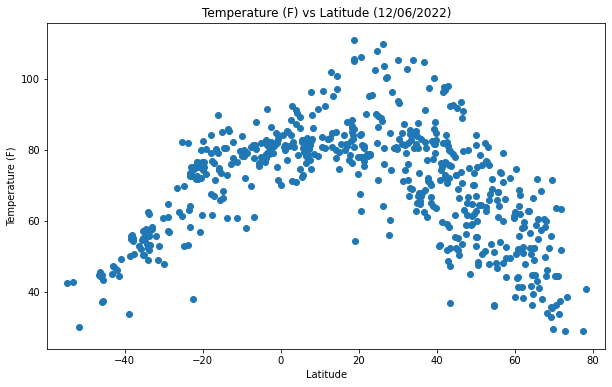

In [11]:
#delcaring  columns as variables
temp_f_values = city_weather_df["Max Temp"]
lat_values = city_weather_df["Lat"]
lng_values = city_weather_df["Lng"]
humidity_values = city_weather_df["Humidity"]
cloudiness_values = city_weather_df["Cloudiness"]
wind_speed_values = city_weather_df["Wind Speed"]

#plotting: x is lat

plt.figure(figsize=(10, 6))
plt.xlim((min(lat_values) - 5),(max(lat_values) + 5))
plt.ylim((min(temp_f_values) - 5),(max(temp_f_values) + 5))

plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title("Temperature (F) vs Latitude (12/06/2022)" )

plt.scatter(lat_values,temp_f_values)
plt.savefig("output_images/Temperature (F) vs Latitude.png")



Not much to explain in terms of the code, the code just plots latitude as x and temperature as y, setting the upper and lower limits to be close to the lowest and highest values of each value.
Same code is used for the all 4 scatter plots so yeah that's it.

# Humidity (%) vs. Latitude

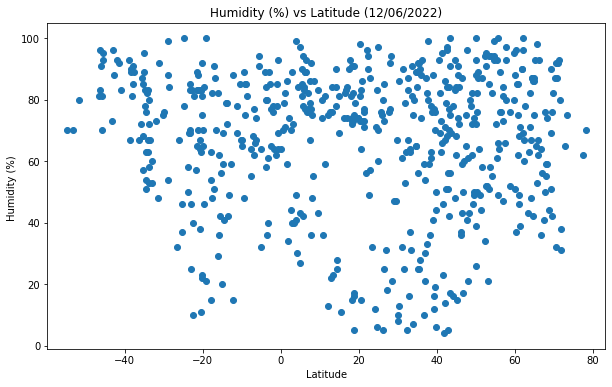

In [12]:

plt.figure(figsize=(10, 6))
plt.xlim((min(lat_values) - 5),(max(lat_values) + 5))
plt.ylim((min(humidity_values) - 5),(max(humidity_values) + 5))

plt.xlabel('Latitude')
plt.ylabel('Humidity (%) ')
plt.title("Humidity (%) vs Latitude (12/06/2022)")

plt.scatter(lat_values,humidity_values)
plt.savefig("output_images/Humidity (%) vs Latitude.png")

# Cloudiness (%) vs. Latitude

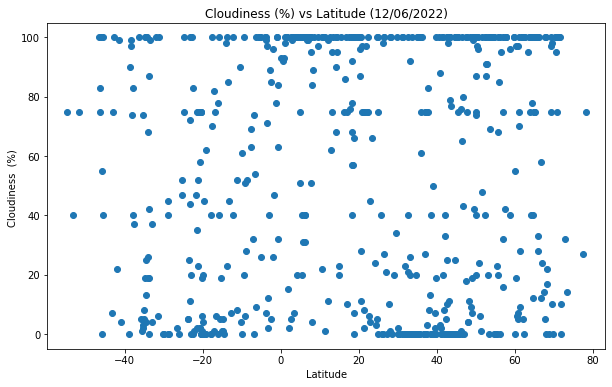

In [13]:
plt.figure(figsize=(10, 6))
plt.xlim((min(lat_values) - 5),(max(lat_values) + 5))
plt.ylim((min(cloudiness_values) - 5),(max(cloudiness_values) + 5))

plt.xlabel('Latitude')
plt.ylabel('Cloudiness  (%) ')
plt.title("Cloudiness (%) vs Latitude (12/06/2022)")

plt.scatter(lat_values,cloudiness_values)
plt.savefig("output_images/Cloudiness (%) vs Latitude.png")

# Wind Speed (mph) vs. Latitude

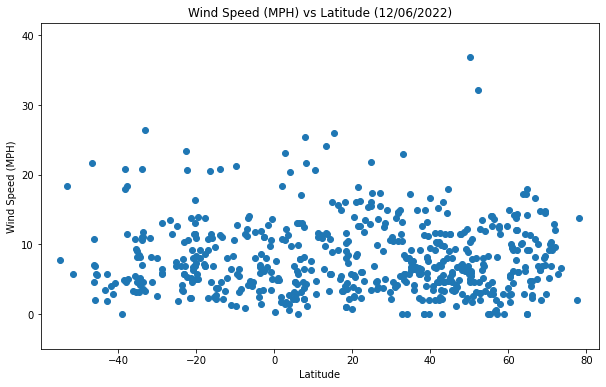

In [14]:
plt.figure(figsize=(10, 6))
plt.xlim((min(lat_values) - 5),(max(lat_values) + 5))
plt.ylim((min(wind_speed_values) - 5),(max(wind_speed_values) + 5))

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.title("Wind Speed (MPH) vs Latitude (12/06/2022)")

plt.scatter(lat_values,wind_speed_values)
plt.savefig("output_images/Temperature (F) vs Latitude.png")

# linear regression on each relationship (Northern and Southern Hemisphere)

In [15]:
#creating 2 new dataframes, northern and southern, split by lat >= 0 for northern and lat < 0 for southern

northern_df = city_weather_df[city_weather_df["Lat"] >= 0]
southern_df = city_weather_df[city_weather_df["Lat"] < 0]

#variables
n_lat = northern_df["Lat"]
n_temp = northern_df["Max Temp"]
n_humidity = northern_df["Humidity"]
n_cloudiness = northern_df["Cloudiness"]
n_windspeed = northern_df["Wind Speed"]

s_lat = southern_df["Lat"]
s_temp = southern_df["Max Temp"]
s_humidity = southern_df["Humidity"]
s_cloudiness = southern_df["Cloudiness"]
s_windspeed = southern_df["Wind Speed"]

### Northern Hemisphere - Temperature (F) vs. Latitude

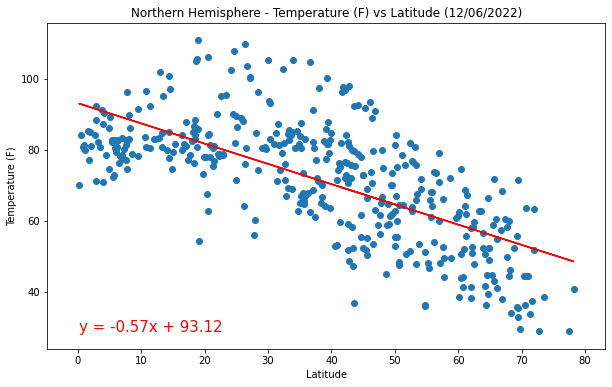

In [16]:
plt.figure(figsize=(10, 6))
plt.xlim((min(n_lat) - 5),(max(n_lat) + 5))
plt.ylim((min(n_temp) - 5),(max(n_temp) + 5))

plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title("Northern Hemisphere - Temperature (F) vs Latitude (12/06/2022)" )

# linear regression code taken from week 5 lesson 2 activity 6
(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lat, n_temp)
regress_values = n_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(n_lat,regress_values,"r-")
#place the formular annotation of the bottom left by getting the min values of the x and y
plt.annotate(line_eq,(min(n_lat),min(n_temp)),fontsize=15,color="red")

plt.scatter(n_lat,n_temp)

plt.savefig("output_images/n_Temperature (F) vs Latitude.png")


### Southern Hemisphere - Temperature (F) vs. Latitude

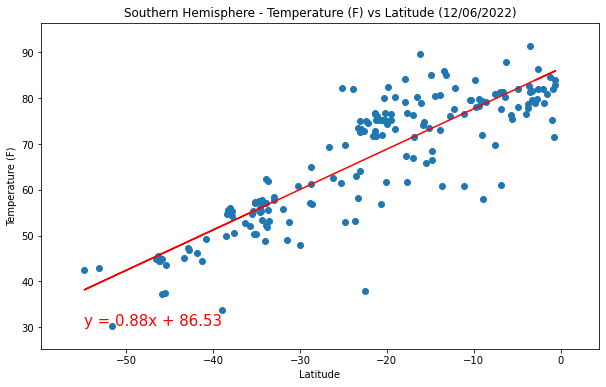

In [17]:
plt.figure(figsize=(10, 6))
plt.xlim((min(s_lat) - 5),(max(s_lat) + 5))
plt.ylim((min(s_temp) - 5),(max(s_temp) + 5))

plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title("Southern Hemisphere - Temperature (F) vs Latitude (12/06/2022)" )

(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lat, s_temp)
regress_values = s_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(s_lat,regress_values,"r-")
#place the formular annotation of the bottom left by getting the min values of the x and y
plt.annotate(line_eq,(min(s_lat),min(s_temp)),fontsize=15,color="red")

plt.scatter(s_lat,s_temp)
plt.savefig("output_images/s_Temperature (F) vs Latitude.png")

# Temp vs lat comments

Looks like there is a strong colleration between lat and temperature, as the plot points are clearly going in a certain direction:
-   between -90 and 0 lat, as lat increases, temperature increases as well. 
- between 0 and 90 lat, as lat increases, temperature will decrease
- that also means temperature increases when closer to the equator


- the linear equation has the value of  0.57 and 0.88x, this is saying on average, if lat increases by 1, temp increases by 0.57 and 0.88 respectively, which can be argued to be somewhat of a strong correlation 


### Northern Hemisphere - Humidity (%) vs. Latitude

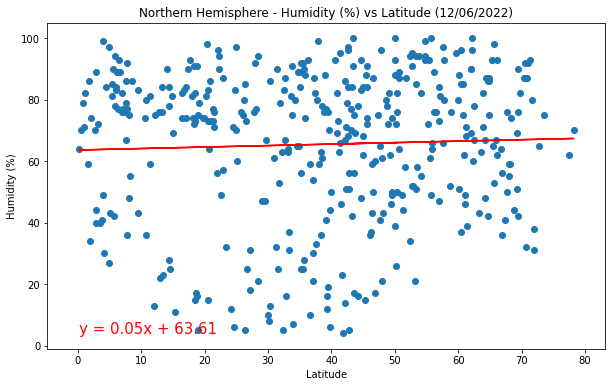

In [18]:
plt.figure(figsize=(10, 6))
plt.xlim((min(n_lat) - 5),(max(n_lat) + 5))
plt.ylim((min(n_humidity) - 5),(max(n_humidity) + 5))

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("Northern Hemisphere - Humidity (%) vs Latitude (12/06/2022)" )

(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lat, n_humidity)
regress_values = n_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(n_lat,regress_values,"r-")
#place the formular annotation of the bottom left by getting the min values of the x and y
plt.annotate(line_eq,(min(n_lat),min(n_humidity)),fontsize=15,color="red")

plt.scatter(n_lat,n_humidity)
plt.savefig("output_images/n_humidity (%) vs Latitude.png")

### Southern Hemisphere - Humidity (%) vs. Latitude

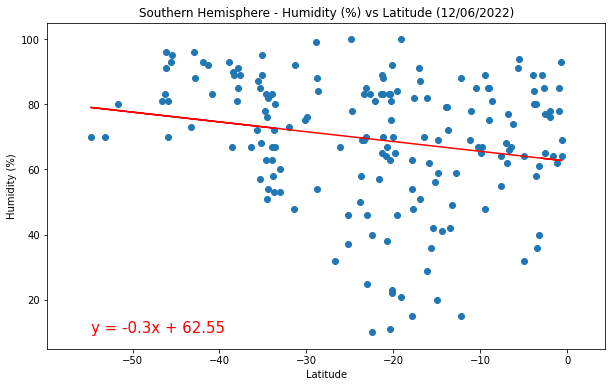

In [19]:
plt.figure(figsize=(10, 6))
plt.xlim((min(s_lat) - 5),(max(s_lat) + 5))
plt.ylim((min(s_humidity) - 5),(max(s_humidity) + 5))

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("Southern Hemisphere - Humidity (%) vs Latitude (12/06/2022)" )

(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lat, s_humidity)
regress_values = s_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(s_lat,regress_values,"r-")
#place the formular annotation of the bottom left by getting the min values of the x and y
plt.annotate(line_eq,(min(s_lat),min(s_humidity)),fontsize=15,color="red")

plt.scatter(s_lat,s_humidity)
plt.savefig("output_images/s_humidity (%) vs Latitude.png")

# humidity vs lat comments

linear line is flat on both graphs, implies there is little to 0 correlation between humidity and lat
scatter points are all over the place, no identifiable pattern seen

### Northern Hemisphere - Cloudiness (%) vs. Latitude

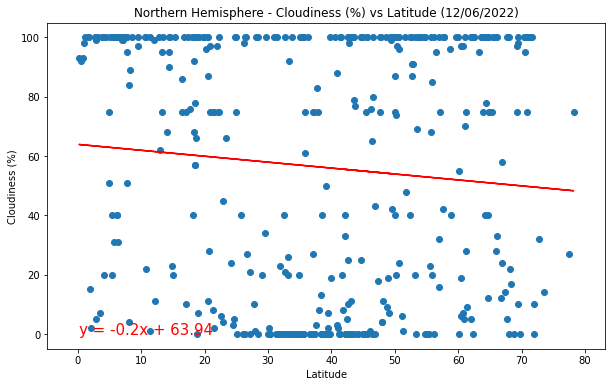

In [20]:
plt.figure(figsize=(10, 6))
plt.xlim((min(n_lat) - 5),(max(n_lat) + 5))
plt.ylim((min(n_cloudiness) - 5),(max(n_cloudiness) + 5))

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("Northern Hemisphere - Cloudiness (%) vs Latitude (12/06/2022)" )

(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lat, n_cloudiness)
regress_values = n_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(n_lat,regress_values,"r-")
#place the formular annotation of the bottom left by getting the min values of the x and y
plt.annotate(line_eq,(min(n_lat),min(n_cloudiness)),fontsize=15,color="red")

plt.scatter(n_lat,n_cloudiness)
plt.savefig("output_images/n_Cloudiness (%) vs Latitude.png")

### Southern Hemisphere - Cloudiness (%) vs. Latitude

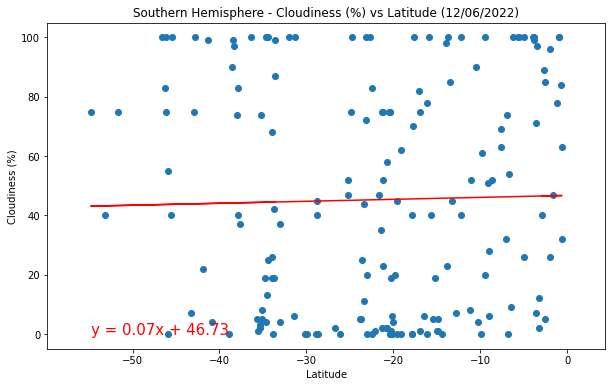

In [21]:
plt.figure(figsize=(10, 6))
plt.xlim((min(s_lat) - 5),(max(s_lat) + 5))
plt.ylim((min(s_cloudiness) - 5),(max(s_cloudiness) + 5))

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("Southern Hemisphere - Cloudiness (%) vs Latitude (12/06/2022)" )

(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lat, s_cloudiness)
regress_values = s_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(s_lat,regress_values,"r-")
#place the formular annotation of the bottom left by getting the min values of the x and y
plt.annotate(line_eq,(min(s_lat),min(s_cloudiness)),fontsize=15,color="red")

plt.scatter(s_lat,s_cloudiness)
plt.savefig("output_images/s_Cloudiness (%) vs Latitude.png")

# cloudiness vs lat comments

linear line is flat on both graphs, implies there is little to 0 correlation between cloudiness and lat
again the scatter points are all over the place, no identifiable pattern seen

### Northern Hemisphere - Wind Speed (mph) vs. Latitude

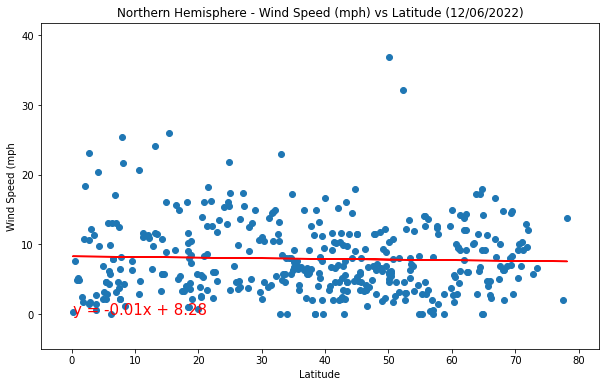

In [22]:
plt.figure(figsize=(10, 6))
plt.xlim((min(n_lat) - 5),(max(n_lat) + 5))
plt.ylim((min(n_windspeed) - 5),(max(n_windspeed) + 5))

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph')
plt.title("Northern Hemisphere - Wind Speed (mph) vs Latitude (12/06/2022)" )

(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lat, n_windspeed)
regress_values = n_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(n_lat,regress_values,"r-")
#place the formular annotation of the bottom left by getting the min values of the x and y
plt.annotate(line_eq,(min(n_lat),min(n_windspeed)),fontsize=15,color="red")

plt.scatter(n_lat,n_windspeed)
plt.savefig("output_images/n_Wind_Speed (mph) vs Latitude.png")

### Southern Hemisphere - Wind Speed (mph) vs. Latitude

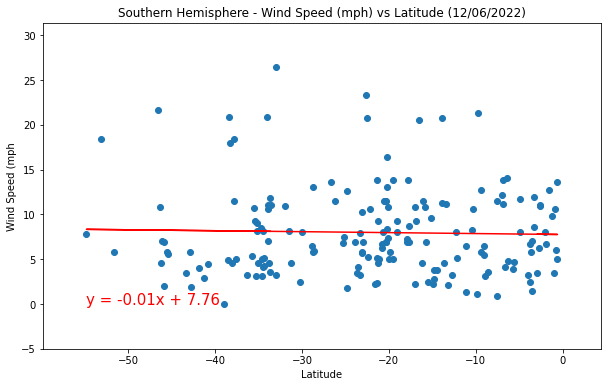

In [23]:
plt.figure(figsize=(10, 6))
plt.xlim((min(s_lat) - 5),(max(s_lat) + 5))
plt.ylim((min(s_windspeed) - 5),(max(s_windspeed) + 5))

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph')
plt.title("Southern Hemisphere - Wind Speed (mph) vs Latitude (12/06/2022)" )

(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lat, s_windspeed)
regress_values = s_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(s_lat,regress_values,"r-")
#place the formular annotation of the bottom left by getting the min values of the x and y
plt.annotate(line_eq,(min(s_lat),min(s_windspeed)),fontsize=15,color="red")

plt.scatter(s_lat,s_windspeed)
plt.savefig("output_images/s_Wind_Speed (mph) vs Latitude.png")

# Wind speed vs lat comments

linear line is flat on both graphs, implies there is little to 0 correlation between cloudiness and lat
again the scatter points are all over the place, no identifiable pattern seen